# Time Based Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import csv
import collections
import time

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [20]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID_encoded'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName_encoded'] = label_encoder.fit_transform(data['MapName'])

# convert 1 to 0 and 2 to 1
data['Winner'] = data['Winner'].replace(1, 0)
data['Winner'] = data['Winner'].replace(2, 1)

# Apply the function to each group of 'ReplayID' and concatenate the results
nearest_rows = data[data['Frame'] == 1800 * 10]

# Reset the index if needed
# nearest_rows.reset_index(drop=True, inplace=True)


In [21]:
nearest_rows

,ReplayID,Duration,Frame,MapName,MapWidth,MapHeight,Player1_EAPM,Player1_ECmdCount,Player1_Race,Player2_EAPM,...,Player2_Protoss Ground Armor_Level,Player2_Protoss Ground Weapons_Level,Player2_Protoss Plasma Shields_Level,Player2_Reaver Capacity_Level,Player2_Scarab Damage_Level,Player2_Sensor Array_Level,Player2_Singularity Charge_Level,Winner,ReplayID_encoded,MapName_encoded
180,GG10042,28603,18000,| iCCup | PeaksOfBeakdu,96,128,168,3360,Protoss,187,...,0,0,0,0,0,0,1,1,1,163
466,GG10043,34851,18000,| iCCup | Paranoid Android,96,96,182,4434,Protoss,171,...,0,0,0,0,0,0,1,1,2,162
815,GG10056,37973,18000,WCG Gaia 1.1,128,128,148,3896,Protoss,169,...,0,1,0,0,0,0,1,0,3,70
1195,GG1010,38455,18000,Gauntlet2003,128,96,166,4463,Protoss,151,...,0,1,0,0,0,0,1,1,4,85
1580,GG10208,24752,18000,| iCCup | Monty Hall 1.1 o,128,128,165,2853,Protoss,153,...,0,1,0,0,0,0,1,1,5,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141686,TL89,30124,18000,The Lost Temple_Gamei,128,128,180,3800,Protoss,21,...,0,0,0,0,0,0,0,0,359,106
141987,TL900,53788,18000,Desert FoX,128,128,187,7027,Protoss,171,...,0,0,0,0,0,0,0,0,360,82
142525,TL937,34624,18000,신 백두대간 2.4,96,128,216,5225,Protoss,223,...,0,1,0,0,0,0,0,1,361,41
142871,TL959,49197,18000,Rush Hour Ⅲ,128,128,151,5181,Protoss,120,...,0,0,0,0,0,0,1,0,362,65


In [22]:
# Define features (X) and target variable (y)
X = nearest_rows.drop(['ReplayID', 'Winner','Player1_Race', 'Player2_Race', 'MapName'], axis=1)
y = nearest_rows['Winner']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% test

In [24]:
# Initialize the RandomForestClassifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


1.0
Accuracy: 0.68
2.0
Accuracy: 0.73
3.0
Accuracy: 0.75
4.0
Accuracy: 0.71
5.0
Accuracy: 0.76
6.0
Accuracy: 0.72
7.0
Accuracy: 0.74
8.0
Accuracy: 0.78
9.0
Accuracy: 0.84
10.0
Accuracy: 0.92
11.0
Accuracy: 0.74
12.0
Accuracy: 0.65
13.0
Accuracy: 0.61
14.0
Accuracy: 0.65
15.0
Accuracy: 0.77
16.0
Accuracy: 0.59
17.0
Accuracy: 0.72
18.0
Accuracy: 0.79
19.0
Accuracy: 0.67
20.0
Accuracy: 0.81
21.0
Accuracy: 0.55
22.0
Accuracy: 0.75
23.0
Accuracy: 0.78
24.0
Accuracy: 0.88
25.0
Accuracy: 0.80
26.0
Accuracy: 0.67
27.0
Accuracy: 0.77
28.0
Accuracy: 0.75
29.0
Accuracy: 0.40
30.0
Accuracy: 0.44
31.0
Accuracy: 0.38
32.0
Accuracy: 0.57
33.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.71
34.0
Accuracy: 0.67
35.0
Accuracy: 0.80


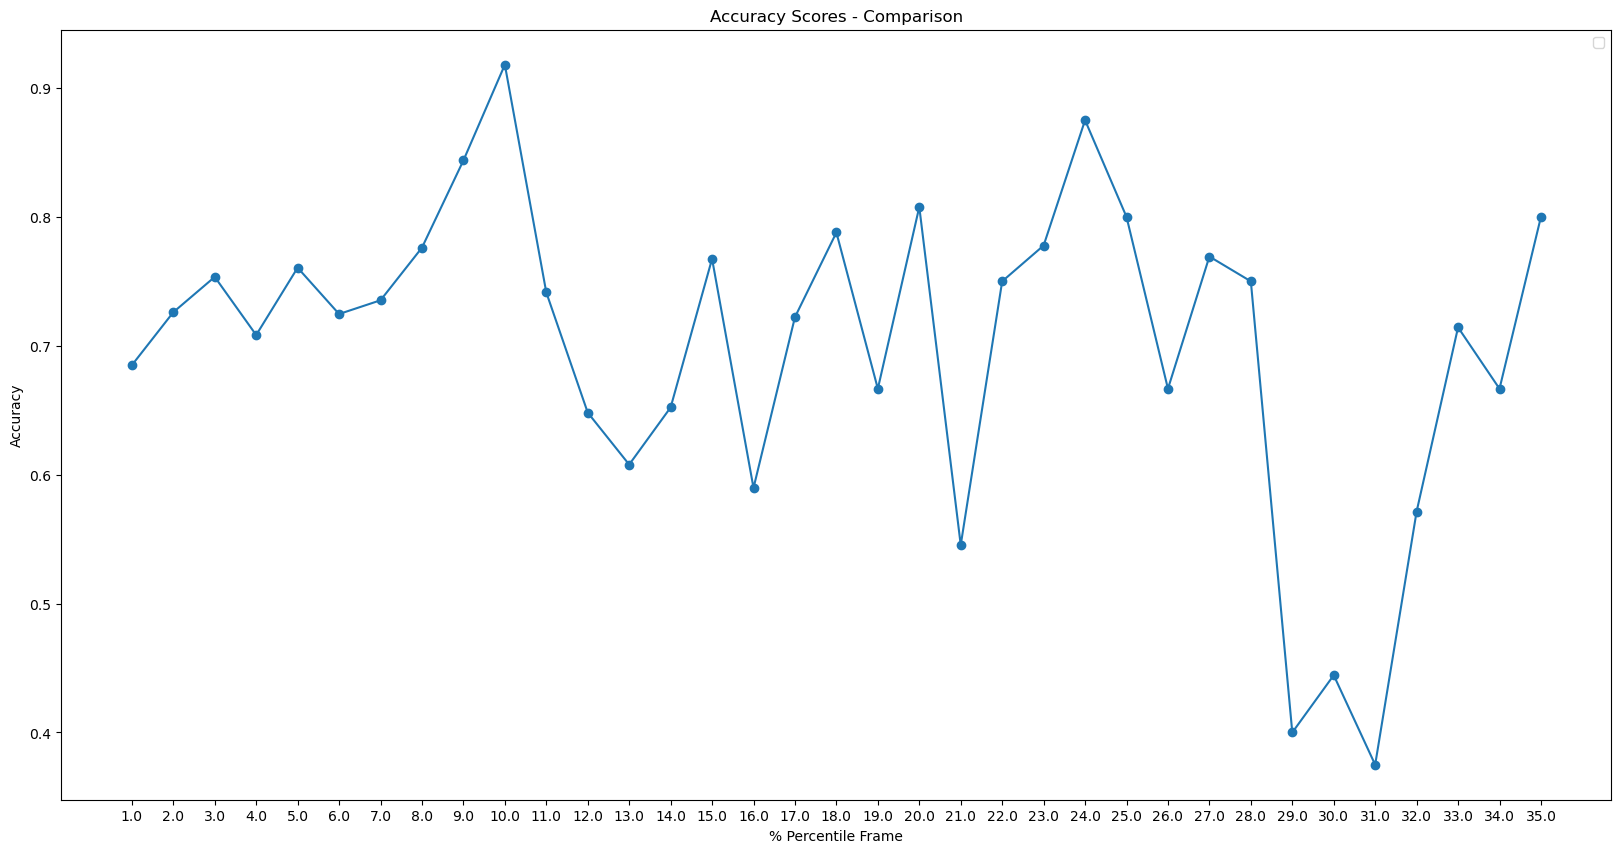

In [25]:
# Load the data
data = pd.read_csv('../1D_All_ReplaysData_PvP.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName'] = label_encoder.fit_transform(data['MapName'])


def calculate_for_per2(per):
    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data[data['Frame'] == per]

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['Winner','Player1_Race', 'Player2_Race'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Return cross-validation scores
    return accuracy


plt.figure(figsize=(20, 10))
temp = []

# max frame rounded to multiples of 1800
max_frame = data['Frame'].max()
ticks = []
for i in range(1800, max_frame, 1800):
    print(i/1800)
    temp.append(calculate_for_per2(i))
    ticks.append(i/1800)

plt.plot(range(1800, max_frame, 1800),temp, marker='o', linestyle='-')
#replace y labels with 1 min to max min where 1800 = 1 min
plt.xlabel('% Percentile Frame')
# make x ticks the range of values from ticks array
plt.xticks(range(1800, max_frame, 1800), ticks)
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


1.0
Accuracy: 0.71
2.0
Accuracy: 0.70
3.0
Accuracy: 0.71
4.0
Accuracy: 0.71
5.0
Accuracy: 0.77
6.0
Accuracy: 0.70
7.0
Accuracy: 0.74
8.0
Accuracy: 0.73
9.0
Accuracy: 0.83
10.0
Accuracy: 0.87
11.0
Accuracy: 0.74
12.0
Accuracy: 0.67
13.0
Accuracy: 0.67
14.0
Accuracy: 0.63
15.0
Accuracy: 0.70
16.0
Accuracy: 0.64
17.0
Accuracy: 0.72
18.0
Accuracy: 0.76
19.0
Accuracy: 0.60
20.0
Accuracy: 0.77
21.0
Accuracy: 0.59
22.0
Accuracy: 0.85
23.0
Accuracy: 0.61
24.0
Accuracy: 0.88
25.0
Accuracy: 0.67
26.0
Accuracy: 0.80
27.0
Accuracy: 0.69
28.0
Accuracy: 0.92
29.0
Accuracy: 0.40
30.0
Accuracy: 0.33
31.0
Accuracy: 0.50
32.0
Accuracy: 0.57
33.0
Accuracy: 0.71
34.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.67
35.0
Accuracy: 1.00


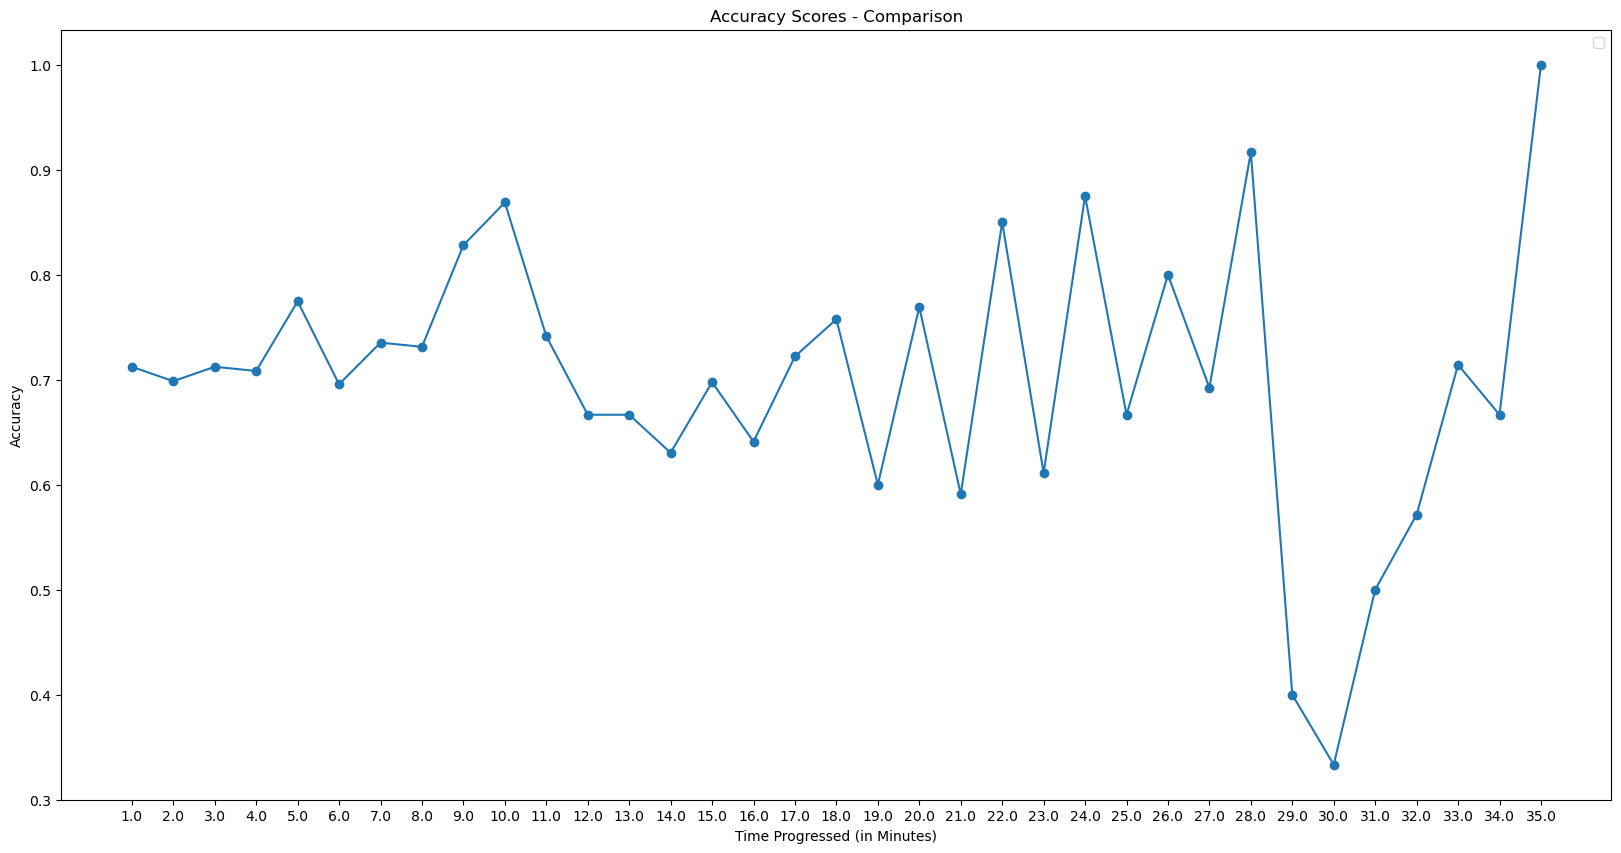

In [62]:
# Load the data
data = pd.read_csv('1D_All_ReplaysData_7.0.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName'] = label_encoder.fit_transform(data['MapName'])
label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


def calculate_for_per2(per):
    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data[data['Frame'] == per]

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['Winner'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Return cross-validation scores
    return accuracy


plt.figure(figsize=(20, 10))
temp = []

# max frame rounded to multiples of 1800
max_frame = data['Frame'].max()
ticks = []
for i in range(1800, max_frame, 1800):
    print(i/1800)
    temp.append(calculate_for_per2(i))
    ticks.append(i/1800)

plt.plot(range(1800, max_frame, 1800),temp, marker='o', linestyle='-')
#replace y labels with 1 min to max min where 1800 = 1 min
plt.xlabel('Time Progressed (in Minutes)')
# make x ticks the range of values from ticks array
plt.xticks(range(1800, max_frame, 1800), ticks)
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


In [134]:
# list files in All directory
import os

# Get the list of all files and directories
path = "C:/Users/abhin/Documents/HW University/Dissertation/lstm testing/CNN testing/All"
dir_list = os.listdir(path)

print("Files and directories in '", path, "' :", dir_list)

Files and directories in ' C:/Users/abhin/Documents/HW University/Dissertation/lstm testing/CNN testing/All ' : ['1D_All_ReplaysData_PvP.csv', '1D_All_ReplaysData_PvT.csv', '1D_All_ReplaysData_PvZ.csv', '1D_All_ReplaysData_TvT.csv', '1D_All_ReplaysData_TvZ.csv', '1D_All_ReplaysData_ZvZ.csv', 'Combine_1D_Replays.ipynb', 'StarCraft_Combined_Dataset.csv']


1.0
Accuracy: 0.66
2.0
Accuracy: 0.64
3.0
Accuracy: 0.66
4.0
Accuracy: 0.67
5.0
Accuracy: 0.66
6.0
Accuracy: 0.67
7.0
Accuracy: 0.64
8.0
Accuracy: 0.71
9.0
Accuracy: 0.68
10.0
Accuracy: 0.66
11.0
Accuracy: 0.66
12.0
Accuracy: 0.69
13.0
Accuracy: 0.69
14.0
Accuracy: 0.64
15.0
Accuracy: 0.67
16.0
Accuracy: 0.72
17.0
Accuracy: 0.69
18.0
Accuracy: 0.69
19.0
Accuracy: 0.66
20.0
Accuracy: 0.64
21.0
Accuracy: 0.66
22.0
Accuracy: 0.64
23.0
Accuracy: 0.58
24.0
Accuracy: 0.69
25.0
Accuracy: 0.64
26.0
Accuracy: 0.64
27.0
Accuracy: 0.64
28.0
Accuracy: 0.62
29.0
Accuracy: 0.64
30.0
Accuracy: 0.61
31.0
Accuracy: 0.57
32.0
Accuracy: 0.37
33.0
Accuracy: 0.61
34.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.42
35.0
Accuracy: 0.53


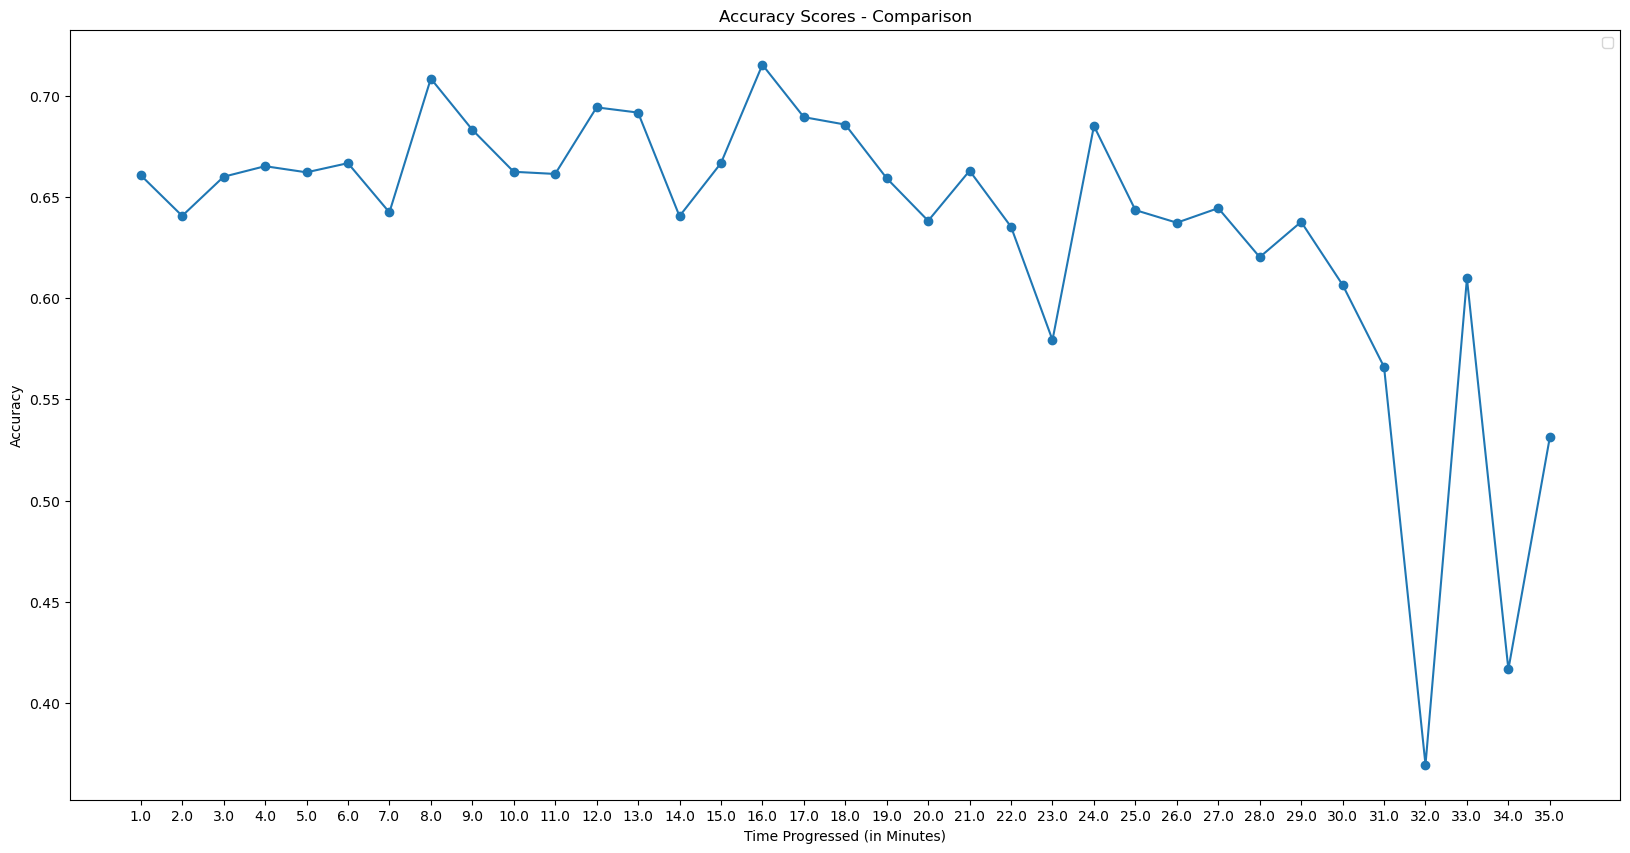

In [125]:


# Load the data
data = pd.read_csv('All/StarCraft_Combined_Dataset.csv')  # Replace with your actual file path

# Assuming combined_data is your DataFrame
data = data.drop(data[data['Winner'] == 0].index)
# Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
label_encoder = LabelEncoder()
data['ReplayID'] = label_encoder.fit_transform(data['ReplayID'])
# data['Winner'] = label_encoder.fit_transform(data['Winner'])
data['MapName'] = label_encoder.fit_transform(data['MapName'])
label_encoder = LabelEncoder()
label_encoders = {}

for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


def calculate_for_per2(per):
    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data[data['Frame'] == per]

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['Winner'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Return cross-validation scores
    return accuracy


plt.figure(figsize=(20, 10))
temp = []

# max frame rounded to multiples of 1800
max_frame = data['Frame'].max()
ticks = []
for i in range(1800, max_frame, 1800):
    print(i/1800)
    temp.append(calculate_for_per2(i))
    ticks.append(i/1800)

plt.plot(range(1800, max_frame, 1800),temp, marker='o', linestyle='-')
#replace y labels with 1 min to max min where 1800 = 1 min
plt.xlabel('Time Progressed (in Minutes)')
# make x ticks the range of values from ticks array
plt.xticks(range(1800, max_frame, 1800), ticks)
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


In [27]:
files = ['1D_All_ReplaysData_PvP.csv', '1D_All_ReplaysData_PvT.csv', '1D_All_ReplaysData_PvZ.csv', '1D_All_ReplaysData_TvT.csv', '1D_All_ReplaysData_TvZ.csv', '1D_All_ReplaysData_ZvZ.csv', 'StarCraft_Combined_Dataset.csv']

1.0
Accuracy: 0.71
2.0
Accuracy: 0.70
3.0
Accuracy: 0.71
4.0
Accuracy: 0.71
5.0
Accuracy: 0.77
6.0
Accuracy: 0.70
7.0
Accuracy: 0.74
8.0
Accuracy: 0.73
9.0
Accuracy: 0.83
10.0
Accuracy: 0.87
11.0
Accuracy: 0.74
12.0
Accuracy: 0.67
13.0
Accuracy: 0.67
14.0
Accuracy: 0.63
15.0
Accuracy: 0.70
16.0
Accuracy: 0.64
17.0
Accuracy: 0.72
18.0
Accuracy: 0.76
19.0
Accuracy: 0.60
20.0
Accuracy: 0.77
21.0
Accuracy: 0.59
22.0
Accuracy: 0.85
23.0
Accuracy: 0.61
24.0
Accuracy: 0.88
25.0
Accuracy: 0.67
26.0
Accuracy: 0.80
27.0
Accuracy: 0.69
28.0
Accuracy: 0.92
29.0
Accuracy: 0.40
30.0
Accuracy: 0.33
31.0
Accuracy: 0.50
32.0
Accuracy: 0.57
33.0
Accuracy: 0.71
34.0
Accuracy: 0.67
35.0
Accuracy: 1.00
1.0
Accuracy: 0.76
2.0
Accuracy: 0.74
3.0
Accuracy: 0.66
4.0
Accuracy: 0.67
5.0
Accuracy: 0.72
6.0
Accuracy: 0.66
7.0
Accuracy: 0.76
8.0
Accuracy: 0.72
9.0
Accuracy: 0.77
10.0
Accuracy: 0.72
11.0
Accuracy: 0.77
12.0
Accuracy: 0.74
13.0
Accuracy: 0.69
14.0
Accuracy: 0.80
15.0
Accuracy: 0.82
16.0
Accuracy: 0.7

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

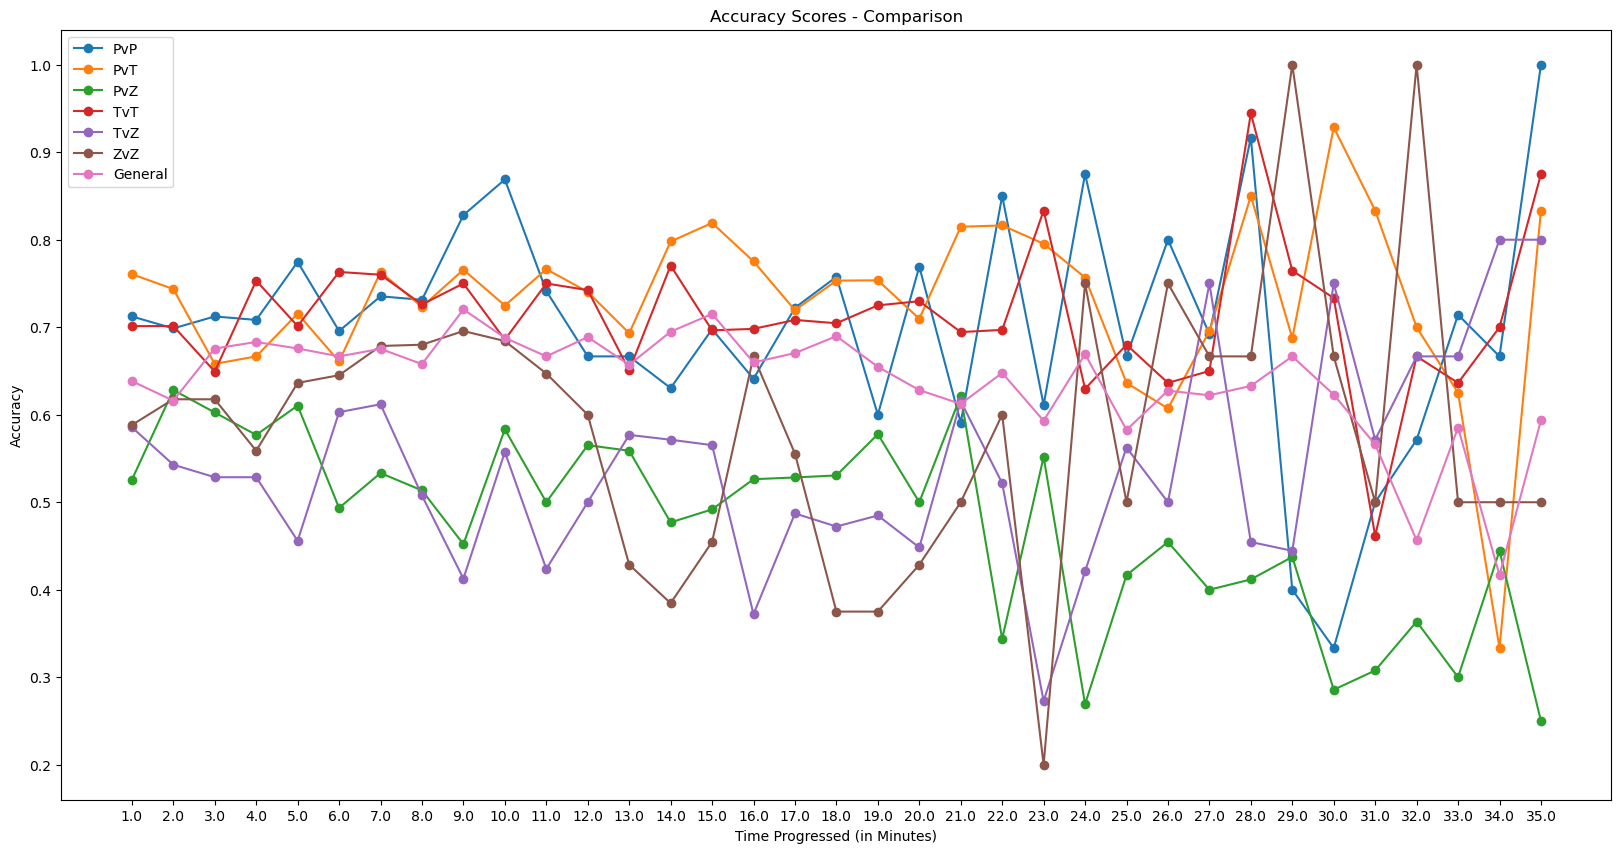

In [59]:
temp_array = []
ticks_array = []

for file in files:
    # Load the data
    data = pd.read_csv('../' + file)  # Replace with your actual file path

    # Assuming combined_data is your DataFrame
    data = data.drop(data[data['Winner'] == 0].index)
    # Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
    label_encoder = LabelEncoder()
    data['ReplayID'] = label_encoder.fit_transform(data['ReplayID'])
    # data['Winner'] = label_encoder.fit_transform(data['Winner'])
    data['MapName'] = label_encoder.fit_transform(data['MapName'])
    label_encoder = LabelEncoder()
    label_encoders = {}

    for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

        
    plt.figure(figsize=(20, 10))
    temp = []

    # max frame rounded to multiples of 1800
    max_frame = data['Frame'].max()
    ticks = []
    for i in range(1800, max_frame, 1800):
        print(i/1800)
        temp.append(calculate_for_per2(i))
        ticks.append(i/1800)
    temp_array.append(temp)
    ticks_array.append(ticks)


def calculate_for_per2(per):
    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data[data['Frame'] == per]

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['Winner'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Return cross-validation scores
    return accuracy

labels = ['PvP',"PvT","PvZ","TvT","TvZ","ZvZ","General"]
# plt.plot(range(1800, max_frame, 1800),temp, marker='o', linestyle='-')
for i in range(len(temp_array)):
    plt.plot(range(1800, max_frame, 1800),temp_array[i], marker='o', linestyle='-', label=labels[i])
#replace y labels with 1 min to max min where 1800 = 1 min
plt.xlabel('Time Progressed (in Minutes)')
# make x ticks the range of values from ticks array
plt.xticks(range(1800, max_frame, 1800), ticks)
plt.ylabel('Accuracy')
plt.title('Accuracy Scores - Comparison')
plt.legend()
plt.show()


In [56]:
temp_array = []
ticks_array = []

for file in files:
    # Load the data
    data = pd.read_csv('../' + file)  # Replace with your actual file path

    # Assuming combined_data is your DataFrame
    data = data.drop(data[data['Winner'] == 0].index)
    # Assuming df is your DataFrame and 'ReplayID' is the column to be encoded
    label_encoder = LabelEncoder()
    data['ReplayID'] = label_encoder.fit_transform(data['ReplayID'])
    # data['Winner'] = label_encoder.fit_transform(data['Winner'])
    data['MapName'] = label_encoder.fit_transform(data['MapName'])
    label_encoder = LabelEncoder()
    label_encoders = {}

    for column in ['ReplayID', 'Player1_Race', 'Player2_Race', 'MapName']:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

        
    plt.figure(figsize=(20, 10))
    temp = []

    # max frame rounded to multiples of 1800
    max_frame = data['Frame'].max()
    ticks = []
    # for i in range(1800, max_frame, 3600):
    #     print(i/1800)
    # temp.append(calculate_for_per2(1800*10))
    ticks.append(1800*10)
    temp_array.append(calculate_for_per2(1800*10))
    ticks_array.append(ticks)


def calculate_for_per2(per):
    # Apply the function to each group of 'ReplayID' and concatenate the results
    nearest_rows = data[data['Frame'] == per]

    # Define features (X) and target variable (y)
    X = nearest_rows.drop(['Winner'], axis=1)
    y = nearest_rows['Winner']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForestClassifier (you can choose other classifiers as well)
    clf = RandomForestClassifier(random_state=42)

    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Return cross-validation scores
    return accuracy

Accuracy: 0.87
Accuracy: 0.72
Accuracy: 0.58
Accuracy: 0.69
Accuracy: 0.56
Accuracy: 0.68
Accuracy: 0.69


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

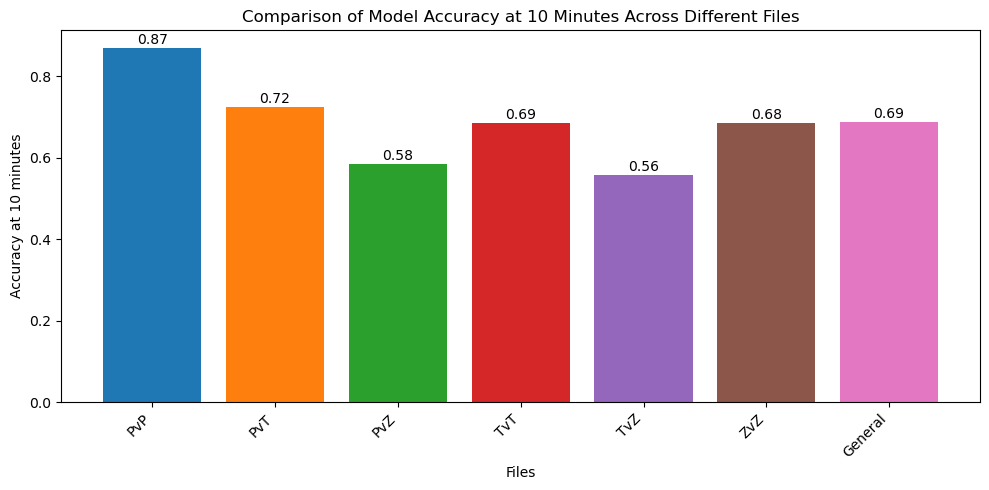

In [57]:
labels = ['PvP',"PvT","PvZ","TvT","TvZ","ZvZ","General"]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+.01, round(y[i],2), ha = 'center')


# Plot the accuracies for each file
plt.figure(figsize=(10, 5))

bars = []
for i in range(len(files)):
    bars.append(plt.bar(labels[i], temp_array[i]))
addlabels(files,temp_array)
plt.xlabel('Files')
plt.xticks(rotation=45, ha="right")  # Rotate x labels for better readability if necessary
plt.ylabel('Accuracy at 10 minutes')
plt.title('Comparison of Model Accuracy at 10 Minutes Across Different Files')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [153]:
%pip install plotly

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
    --------------------------------------- 0.4/15.7 MB 11.9 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.7 MB 13.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.9/15.7 MB 14.9 MB/s eta 0:00:01
   ------- -------------------------------- 3.0/15.7 MB 17.3 MB/s eta 0:00:01
   ----------- ---------------------------- 4.6/15.7 MB 20.8 MB/s eta 0:00:01
   ---------------- ----------------------- 6.6/15.7 MB 24.9 MB/s eta 0:00:01
   ------------------------ --------------- 9.5/15.7 MB 30.2 MB/s eta 0:00:01
   ---------------------------------- ----- 13.6/15.7 MB 59.8 MB/s eta 0:00:01
   ---------------------------------------- 15.7/15.7 MB 65.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
import plotly.express as px

# Create a new figure
fig = px.line()

# Assuming temp_array is a list of lists and each sublist corresponds to a line in the plot
for i, temp in enumerate(temp_array):
    fig.add_scatter(x=list(range(1800, max_frame, 3600)), y=temp, mode='lines+markers', name=labels[i])

# Set the tick labels for every 2 minutes, dividing by 1800 frames per minute
tickvals = list(range(1800, max_frame, 3600))
ticktext = [str(int(val / 1800)) for val in tickvals]

fig.update_layout(
    title='Accuracy Scores - Comparison',
    xaxis=dict(
        title='Time Progressed (in Minutes)',
        tickvals=tickvals,
        ticktext=ticktext
    ),
    yaxis=dict(
        title='Accuracy'
    ),
    legend_title="Legend",
    template="plotly_white" # or any other template you like
)

# Show the figure
fig.show()
